In [6]:
import pandas as pd
from pandas_datareader.data import DataReader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import itertools
%matplotlib inline

In [7]:
tickers=['^GSPC','^DJI','^IXIC',
         'AAPL','GOOG','MSFT','AMZN']
end_date=datetime.datetime.now()
start_date=end_date.replace(year=end_date.year-1)
start_date,end_date

(datetime.datetime(2015, 3, 25, 10, 27, 18, 406002),
 datetime.datetime(2016, 3, 25, 10, 27, 18, 406002))

In [8]:
my_data={}
for ticker in tickers:
    my_data[ticker]=DataReader(ticker,'yahoo',start_date,end_date)

In [9]:
my_data[tickers[0]].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-25,2093.100098,2097.429932,2061.050049,2061.050049,3521140000,2061.050049
2015-03-26,2059.939941,2067.149902,2045.500000,2056.149902,3510670000,2056.149902
2015-03-27,2055.780029,2062.830078,2052.959961,2061.020020,3008550000,2061.020020
2015-03-30,2064.110107,2088.969971,2064.110107,2086.239990,2917690000,2086.239990
2015-03-31,2084.050049,2084.050049,2067.040039,2067.889893,3376550000,2067.889893


In [10]:
my_ticker='^GSPC'

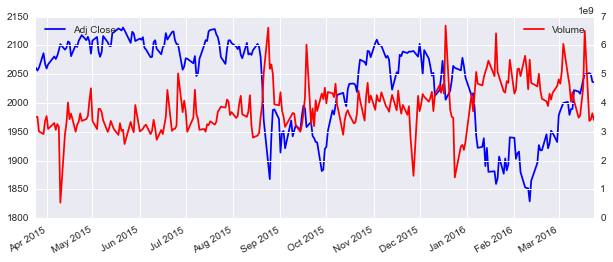

In [11]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax1.plot(my_data[my_ticker].index,my_data[my_ticker]['Adj Close'],color='blue',label='Adj Close')
ax2 = ax1.twinx()
ax2.plot(my_data[my_ticker].index,my_data[my_ticker]['Volume'],color='red',label='Volume')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.autofmt_xdate()

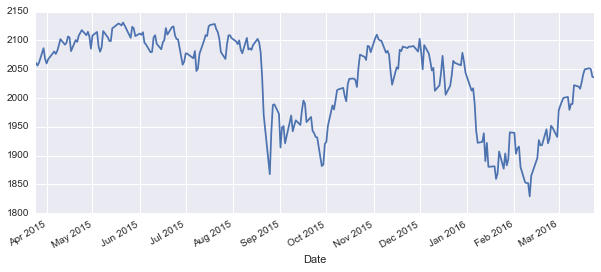

In [12]:
my_data[my_ticker]['Adj Close'].plot(figsize=(10,4))

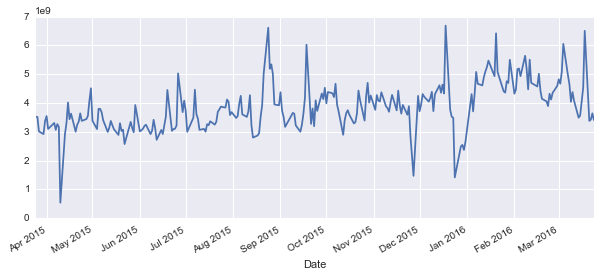

In [13]:
my_data[my_ticker]['Volume'].plot(figsize=(10,4))

In [14]:
ma_lengths=[10,20,50]
for ticker in tickers:
    for ma_length in ma_lengths:
        my_data[ticker]['MA_{}'.format(ma_length)]=pd.rolling_mean(my_data[ticker]['Adj Close'],ma_length)

In [16]:
my_data[tickers[0]].tail()

,Open,High,Low,Close,Volume,Adj Close,MA_10,MA_20,MA_50
Date,,,,,,,,,
2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,6503140000,2049.580078,2013.500000,1986.087000,1932.305793
2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,3376600000,2051.600098,2018.484009,1991.392004,1934.475996
2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,3418460000,2049.800049,2025.538013,1997.818506,1937.031396
2016-03-23,2048.550049,2048.550049,2034.859985,2036.709961,3639510000,2036.709961,2030.283008,2003.164001,1939.292195
2016-03-24,2032.479980,2036.040039,2022.489990,2035.939941,3407720000,2035.939941,2034.920007,2007.376001,1941.237393


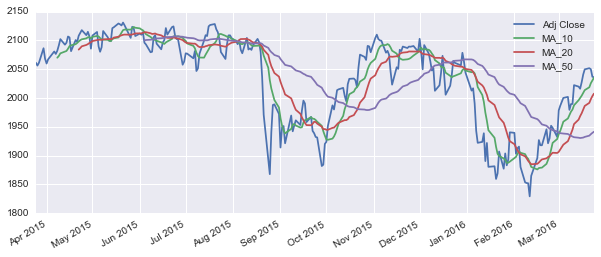

In [17]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(my_data[my_ticker].index,my_data[my_ticker]['Adj Close'],label='Adj Close')
ax.plot(my_data[my_ticker].index,my_data[my_ticker]['MA_10'],label='MA_10')
ax.plot(my_data[my_ticker].index,my_data[my_ticker]['MA_20'],label='MA_20')
ax.plot(my_data[my_ticker].index,my_data[my_ticker]['MA_50'],label='MA_50')
ax.legend()
fig.autofmt_xdate()

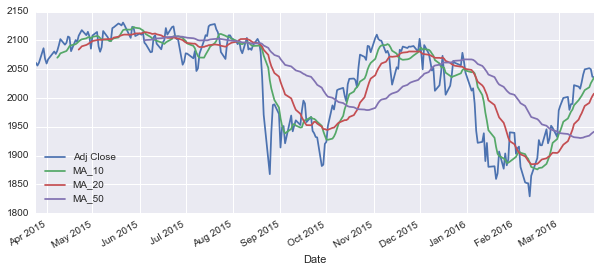

In [18]:
my_data[my_ticker][['Adj Close','MA_10','MA_20','MA_50']].plot(subplots=False,figsize=(10,4))

In [19]:
for ticker in tickers:
    my_data[ticker]['DR']=my_data[ticker]['Adj Close'].pct_change()

In [22]:
my_data[tickers[0]].tail()

,Open,High,Low,Close,Volume,Adj Close,MA_10,MA_20,MA_50,DR
Date,,,,,,,,,,
2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,6503140000,2049.580078,2013.500000,1986.087000,1932.305793,0.004406
2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,3376600000,2051.600098,2018.484009,1991.392004,1934.475996,0.000986
2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,3418460000,2049.800049,2025.538013,1997.818506,1937.031396,-0.000877
2016-03-23,2048.550049,2048.550049,2034.859985,2036.709961,3639510000,2036.709961,2030.283008,2003.164001,1939.292195,-0.006386
2016-03-24,2032.479980,2036.040039,2022.489990,2035.939941,3407720000,2035.939941,2034.920007,2007.376001,1941.237393,-0.000378


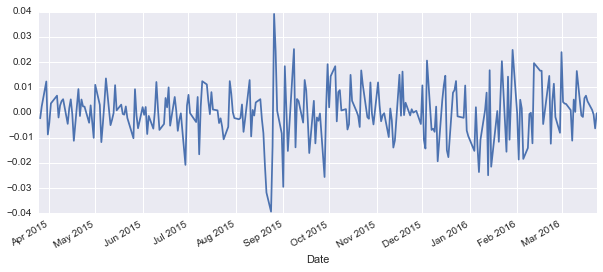

In [23]:
my_data[my_ticker]['DR'].plot(figsize=(10,4))

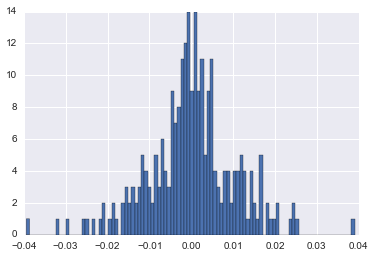

In [24]:
my_data[my_ticker]['DR'].hist(bins=100)

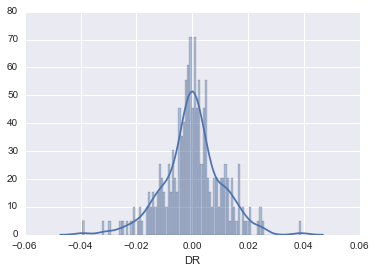

In [25]:
sns.distplot(my_data[my_ticker]['DR'].dropna(),bins=100)

In [26]:
my_adj_close=DataReader(tickers,'yahoo',start_date,end_date)['Adj Close']

In [27]:
my_adj_close.head()

,AAPL,AMZN,GOOG,MSFT,^DJI,^GSPC,^IXIC
Date,,,,,,,
2015-03-25,121.134491,370.959991,558.787539,40.358680,17718.539062,2061.050049,4876.520020
2015-03-26,121.978840,367.350006,555.172522,40.115321,17678.230469,2056.149902,4863.359863
2015-03-27,121.006860,370.559998,548.342512,39.881698,17712.660156,2061.020020,4891.220215
2015-03-30,124.070079,374.589996,552.032502,39.871962,17976.310547,2086.239990,4947.439941
2015-03-31,122.165384,372.100006,548.002468,39.579932,17776.119141,2067.889893,4900.879883


In [28]:
my_DR=my_adj_close.pct_change()

In [29]:
my_DR.head()

,AAPL,AMZN,GOOG,MSFT,^DJI,^GSPC,^IXIC
Date,,,,,,,
2015-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-26,0.006970,-0.009731,-0.006469,-0.006030,-0.002275,-0.002378,-0.002699
2015-03-27,-0.007968,0.008738,-0.012303,-0.005824,0.001948,0.002369,0.005729
2015-03-30,0.025314,0.010875,0.006729,-0.000244,0.014885,0.012237,0.011494
2015-03-31,-0.015352,-0.006647,-0.007300,-0.007324,-0.011136,-0.008796,-0.009411


In [31]:
ticker_pairs=list(itertools.combinations(tickers,2))
len(ticker_pairs)

21

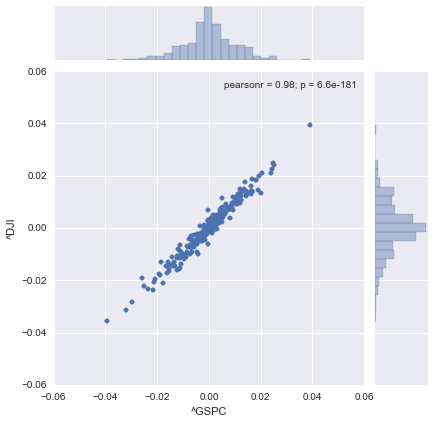

In [32]:
my_ticker_pair=0
sns.jointplot(ticker_pairs[my_ticker_pair][0],ticker_pairs[my_ticker_pair][1],my_DR,kind='scatter')

/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


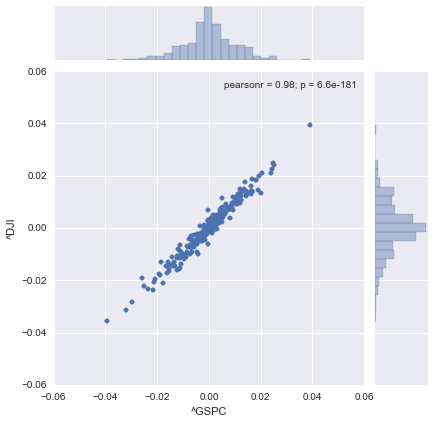

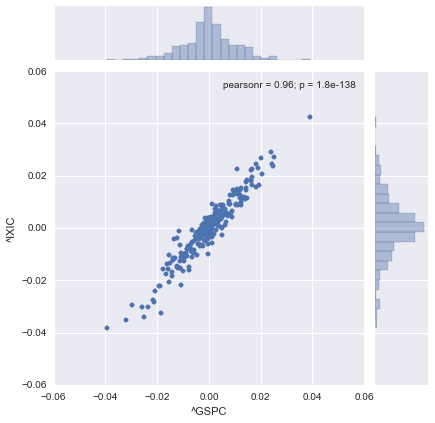

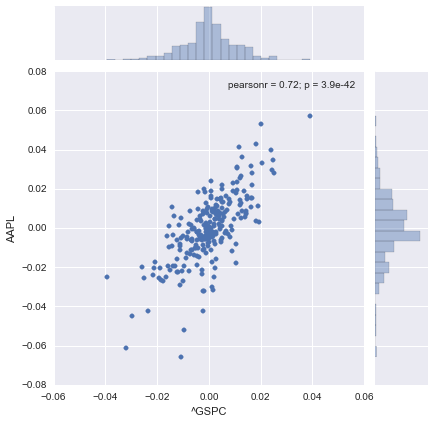

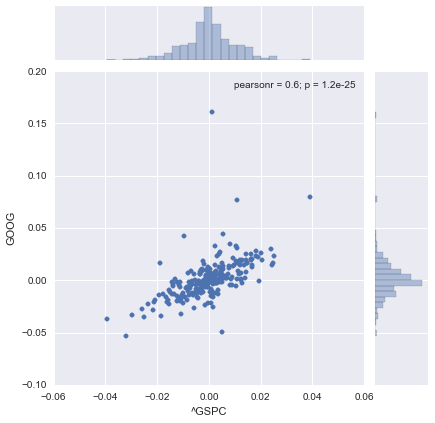

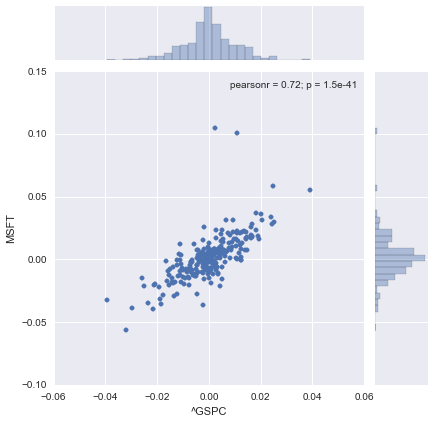

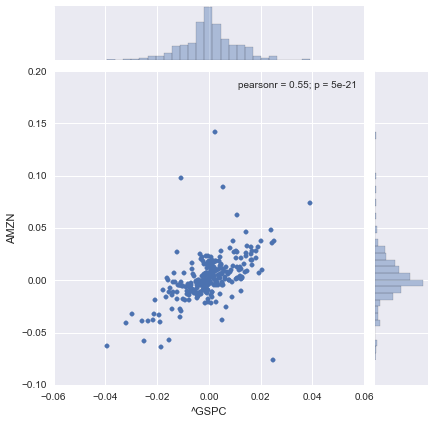

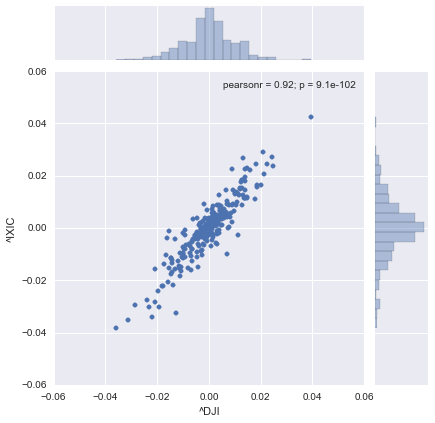

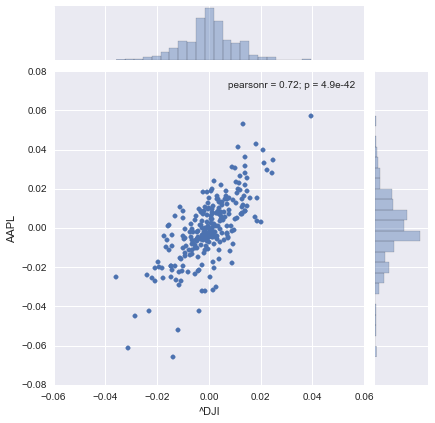

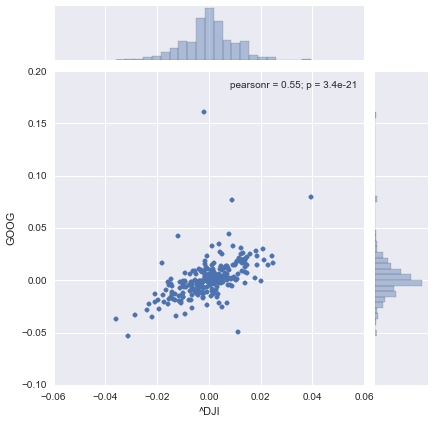

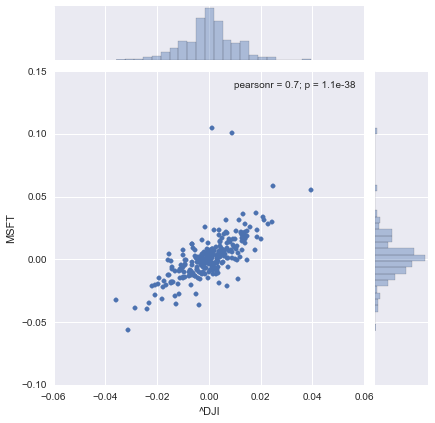

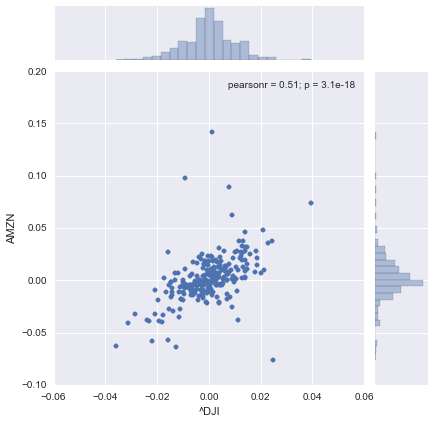

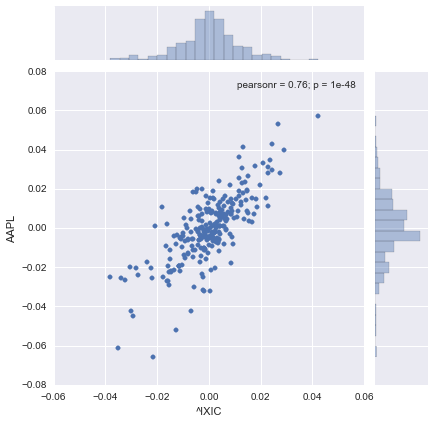

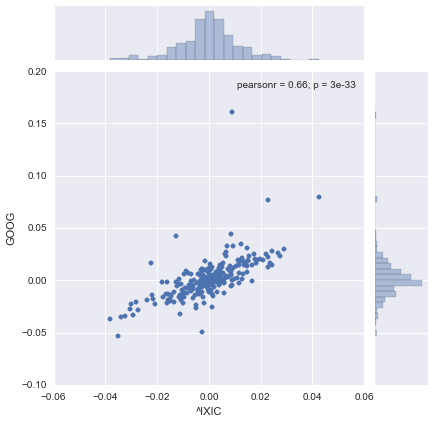

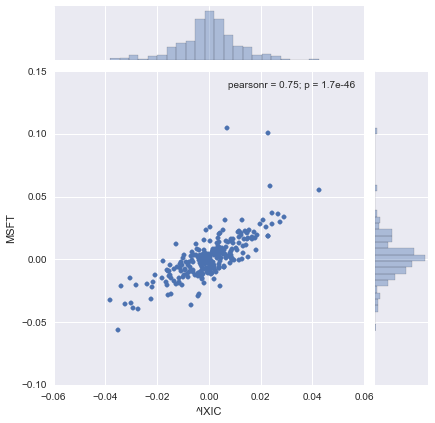

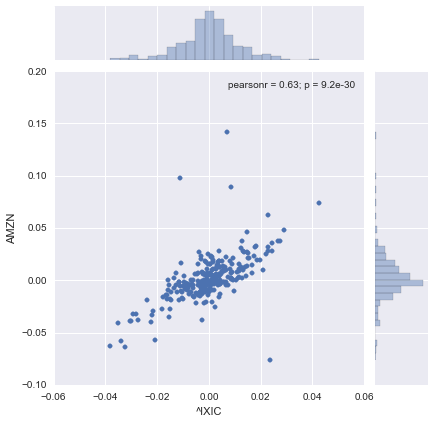

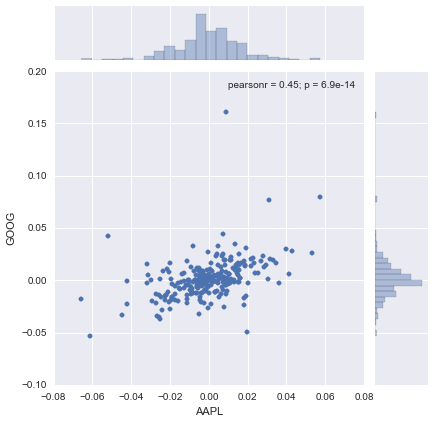

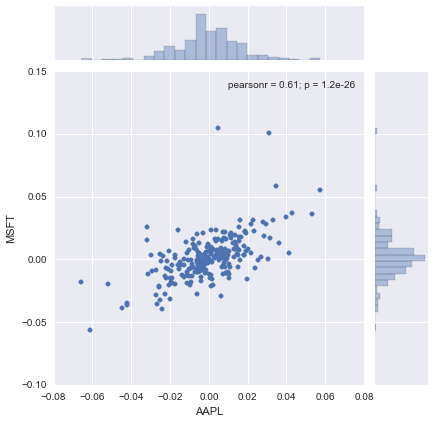

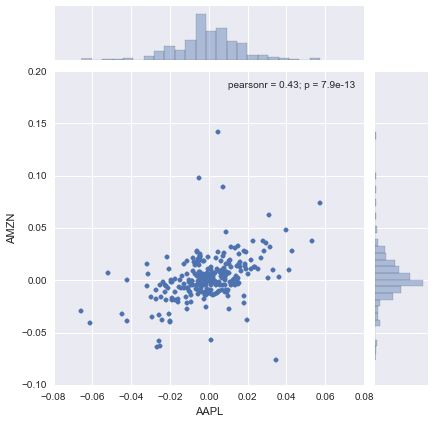

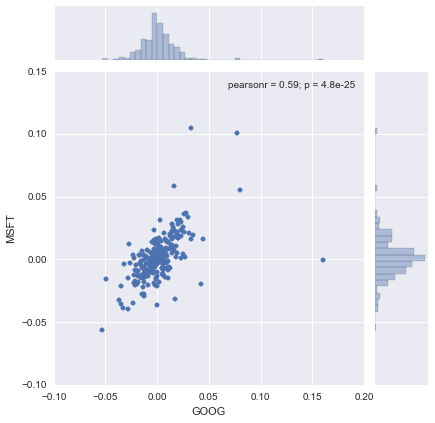

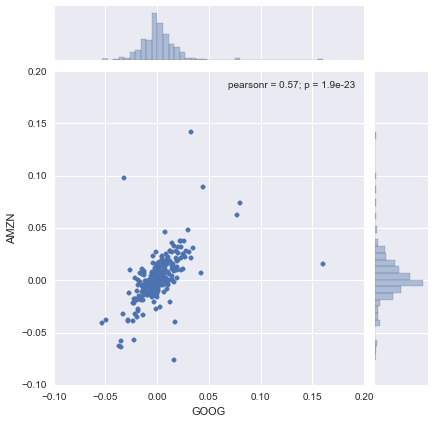

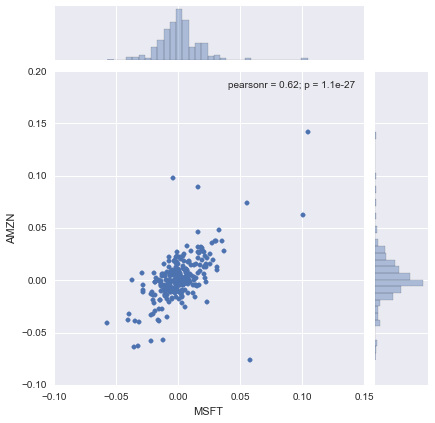

In [33]:
for ticker_pair in ticker_pairs:
    sns.jointplot(ticker_pair[0],ticker_pair[1],my_DR,kind='scatter')

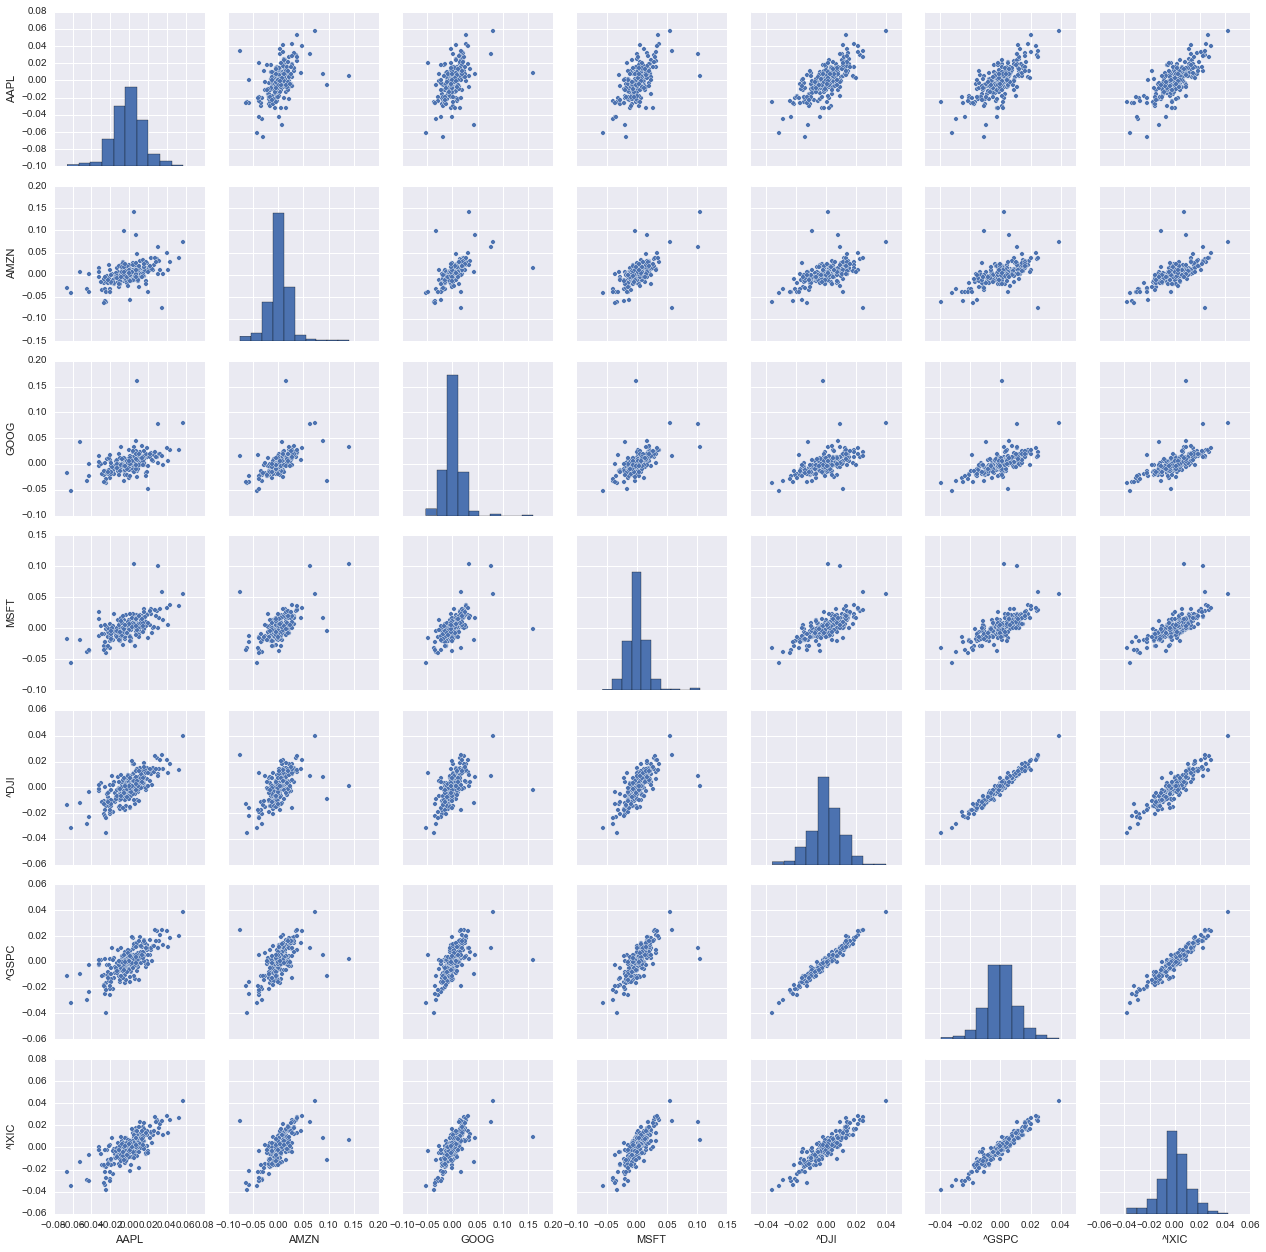

In [34]:
sns.pairplot(my_DR.dropna())

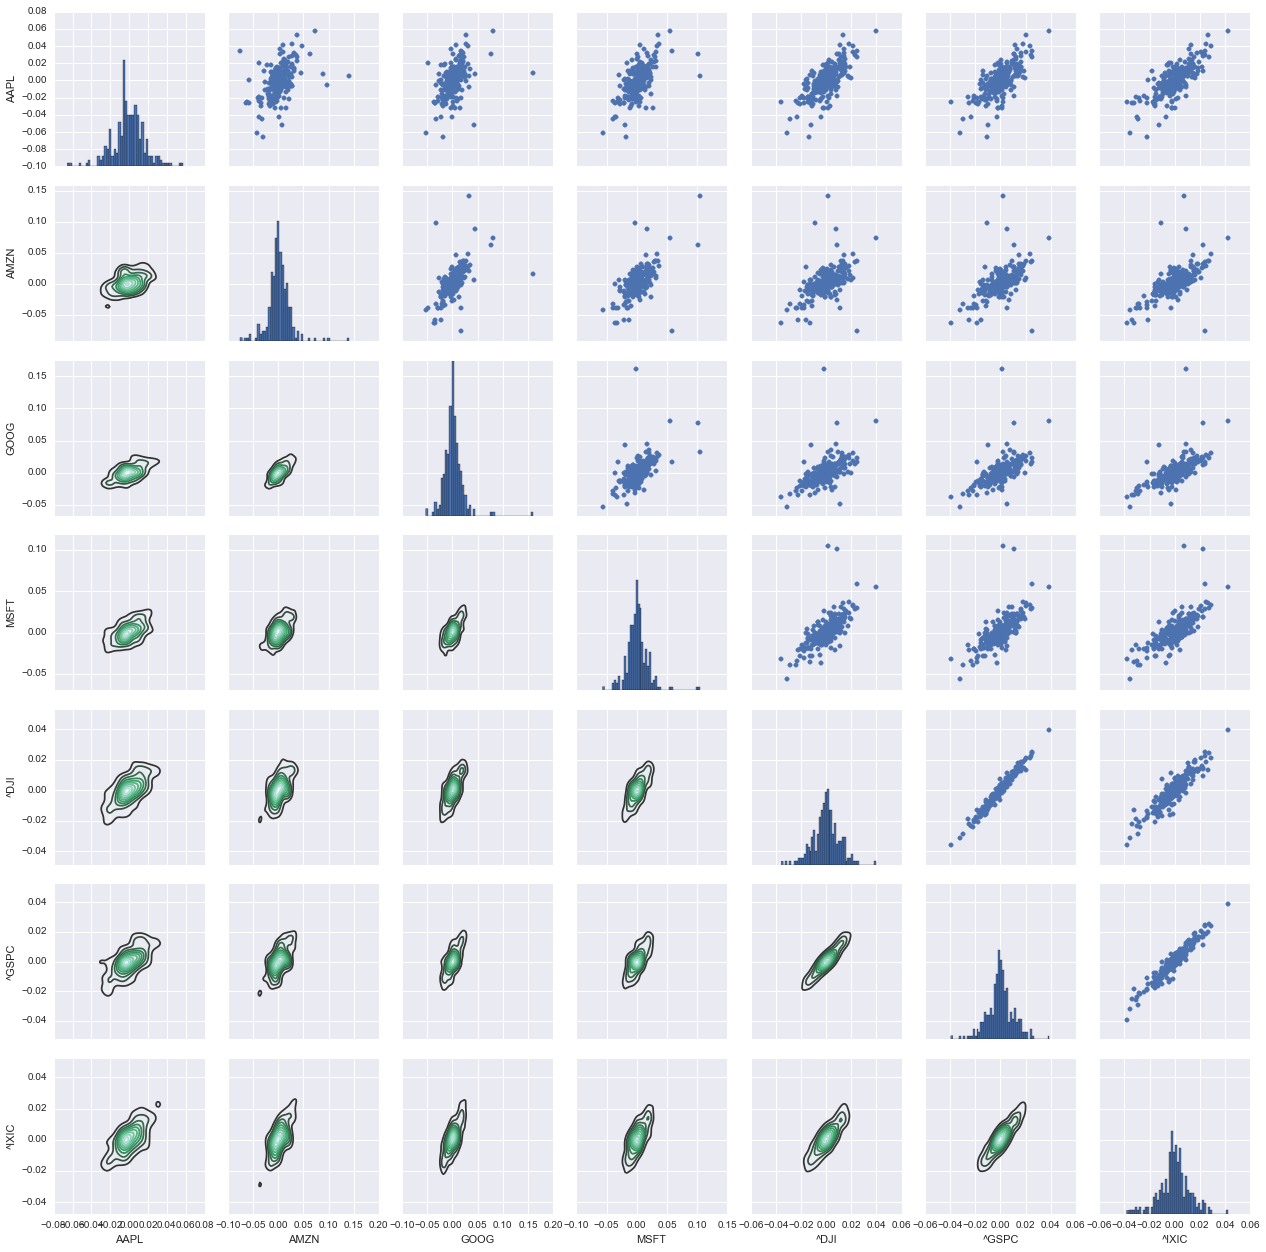

In [35]:
fig=sns.PairGrid(my_DR.dropna())
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot)
fig.map_diag(plt.hist,bins=50)

/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


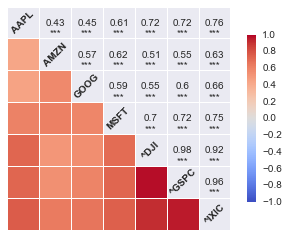

In [36]:
sns.corrplot(my_DR.dropna(),annot=True)

In [37]:
my_DR=my_DR.dropna()

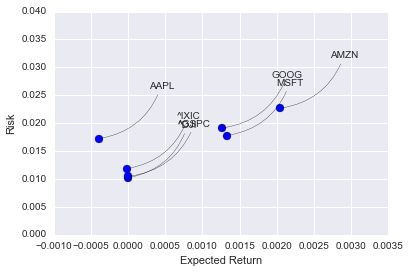

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(my_DR.mean(),my_DR.std(),s=20*np.pi)
ax.set_xlim([-0.001,0.0035])
ax.set_ylim([0,0.04])
ax.set_xlabel('Expected Return')
ax.set_ylabel('Risk')
for label, x, y in zip(my_DR.columns,my_DR.mean(),my_DR.std()):
    ax.annotate(label,
                xy=(x,y),xytext=(50,50),textcoords='offset points',
                arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

In [39]:
pd.concat([my_DR.quantile(0.05),
           my_DR.quantile(0.25),
           my_DR.quantile(0.5),
           my_DR.quantile(0.75),
           my_DR.quantile(0.95)],
          axis=1,keys=['Q_0.05','Q_0.25','Q_0.50','Q_0.75','Q_0.95'])

,Q_0.05,Q_0.25,Q_0.50,Q_0.75,Q_0.95
AAPL,-0.026871,-0.008595,-0.000851,0.008748,0.027989
AMZN,-0.032752,-0.008449,0.000520,0.011908,0.031655
GOOG,-0.022776,-0.008344,-0.000046,0.008885,0.025938
MSFT,-0.021731,-0.008287,0.000110,0.007966,0.026894
^DJI,-0.016979,-0.005185,0.000043,0.005818,0.014891
^GSPC,-0.017168,-0.004880,-0.000078,0.005197,0.016567
^IXIC,-0.021261,-0.005944,0.000309,0.006021,0.019025


In [40]:
my_DR.describe()

,AAPL,AMZN,GOOG,MSFT,^DJI,^GSPC,^IXIC
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,-0.000394,0.002047,0.001267,0.001326,0.000007,0.000006,-0.000014
std,0.017222,0.022682,0.019145,0.017784,0.010235,0.010460,0.011863
min,-0.065707,-0.076100,-0.053105,-0.056724,-0.035748,-0.039414,-0.038204
25%,-0.008595,-0.008449,-0.008344,-0.008287,-0.005185,-0.004880,-0.005944
50%,-0.000851,0.000520,-0.000046,0.000110,0.000043,-0.000078,0.000309
75%,0.008748,0.011908,0.008885,0.007966,0.005818,0.005197,0.006021
max,0.057355,0.141311,0.160524,0.104522,0.039516,0.039034,0.042394


In [41]:
my_ticker='^GSPC'

In [96]:
def price_random_walk(price_0,periods,avg,std):
    random_walk = np.zeros(periods)
    random_walk[0]=price_0
    for period in range(1,periods):
        drift=avg
        shock=np.random.normal(avg,std)
        random_walk[period]=random_walk[period-1]+random_walk[period-1]*(drift+shock)
    return random_walk

In [103]:
start_price=my_data[my_ticker]['Adj Close'][-1]
tot_days=250
expected_return=my_DR[my_ticker].mean()
risk=my_DR[my_ticker].std()

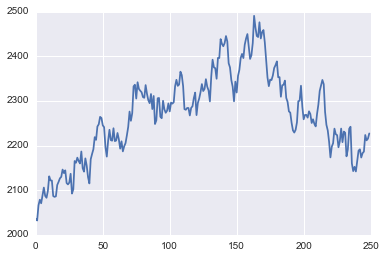

In [105]:
plt.plot(price_random_walk(start_price,tot_days,expected_return,risk))

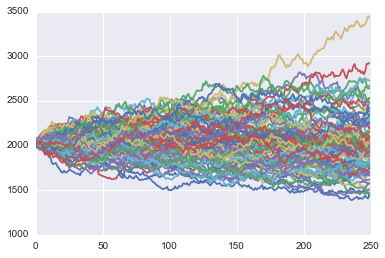

In [116]:
simulations=100
for _ in range(simulations):
    sim=price_random_walk(start_price,tot_days,expected_return,risk)
    plt.plot(sim)

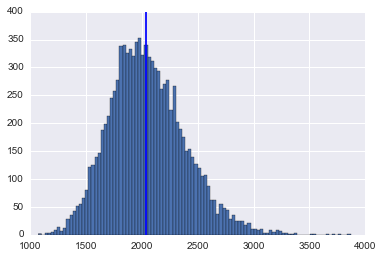

In [123]:
simulations=10000
end_price=np.zeros(simulations)
for simulation in range(simulations):
    end_price[simulation]=price_random_walk(start_price,tot_days,expected_return,risk)[-1]
plt.hist(end_price,bins=100)
plt.axvline(start_price)

In [125]:
np.percentile(end_price,5),start_price-np.percentile(end_price,5)

(1540.1024665216967, 495.83747447830342)